In [3]:
import json
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.tools as tls
% matplotlib inline

In [2]:
import spacy
import en_core_web_sm

nlp = en_core_web_sm.load()

In [6]:
def make_it_pretty():
    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')      

In [53]:
# Combined all the csv files, no need to redo because a pickle of a dataframe is included
fps = ["articles1.csv", "articles2.csv", "articles3.csv"]
allthenews = "C:/Users/forresthooton/Downloads/"


atn = pd.DataFrame()

for fp in fps:
    atn = pd.concat([atn, pd.read_csv(allthenews+fp)], axis = 0, ignore_index = True)

atn = atn.drop('Unnamed: 0', axis=1).reset_index(drop=True)

In [4]:
# This was to combine the file origionally, no need to redo
#atn.to_pickle('all_the_news.pkl')
atn = pd.read_pickle('all_the_news.pkl')

In [1]:
#atn

In [21]:
print('# of authors in all the news', len(atn.author.drop_duplicates()))

# of authors in all the news 3604


In [56]:
atn.year.drop_duplicates()

0         2016.0
1         2017.0
2532      2014.0
5631      2015.0
17077     2013.0
32077     2012.0
38656     2011.0
57140        NaN
57718     2004.0
61607     2008.0
62169     2003.0
62954     2007.0
71798     2005.0
96092     2010.0
97035     2009.0
105029    2000.0
Name: year, dtype: float64

In [57]:
atn.columns

Index(['id', 'title', 'publication', 'author', 'date', 'year', 'month', 'url',
       'content'],
      dtype='object')

In [58]:
# % title lengths unique
len(atn.title.drop_duplicates()) / len(atn.title)

0.9969348390264432

In [5]:
atn['text_length'] = atn.content.str.split().apply(len)

In [6]:
print(atn.text_length.mean())
print(atn.text_length.median())

741.4551027565407
592.0


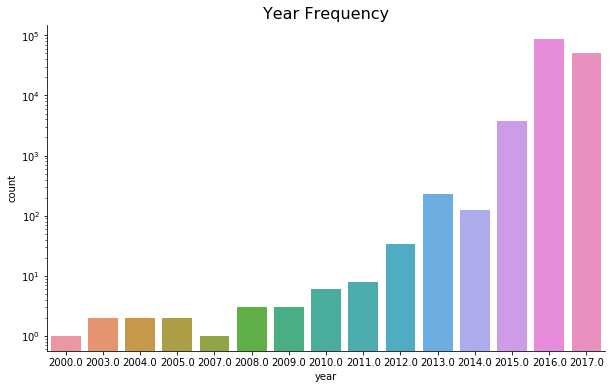

In [7]:
plt.subplots(figsize=(10,6))
ax = sns.countplot(atn.year)
ax.set_title('Year Frequency', fontsize = 16)
ax.set_yscale('log')
make_it_pretty()

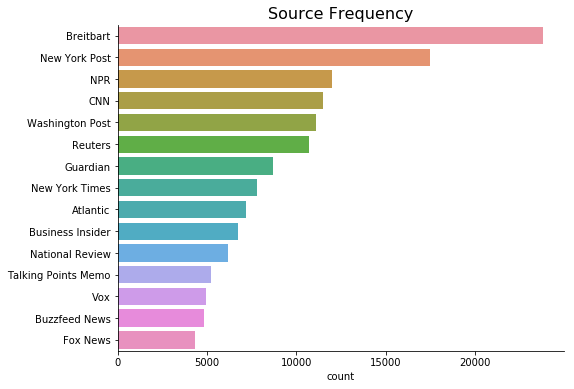

In [10]:
plt.subplots(figsize=(8,6))
viz_data = atn.publication.value_counts()
ax = sns.barplot(y = viz_data.index, x = viz_data, orient='h')
ax.set_title('Source Frequency', fontsize = 16)
ax.set_xlabel('count')
make_it_pretty()

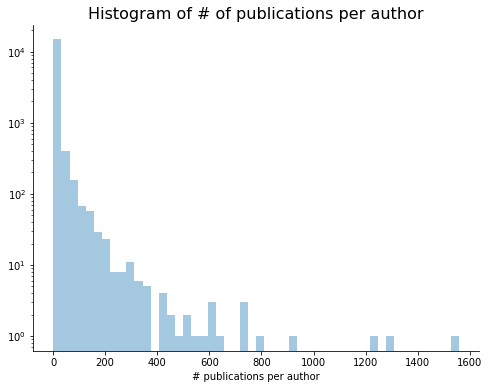

In [27]:
plt.subplots(figsize=(8,6))
viz_data = atn.author.value_counts()
ax = sns.distplot(viz_data, kde=False)
ax.set_title('Histogram of # of publications per author', fontsize=16)
ax.set_yscale('log')
ax.set_xlabel('# publications per author')
make_it_pretty()

In [8]:
#for i in range(15):
#    print(atn.content[i])
#    print()

## In progress

In [100]:
# In progress
#doc1 = nlp(atn.content[0])
#doc2 = nlp(atn.content[1])

In [101]:
#doc1.similarity(doc2)

0.9648222599715472

In [9]:
#atn['nlp_text'] = atn.content.apply(nlp)

In [ ]:
sim_thresh = .97

edge_list = pd.DataFrame()

for idx, row in atn.iterrows():
    for idx2, row2 in atn.iterrows():
        doc1 = nlp(atn.content[0])
        doc2 = nlp(atn.content[1])